Démonstration du pipeline

Import des données de TTE

In [ ]:
from src.data_loader import load_data

df_tte=load_data()

[*********************100%***********************]  1 of 1 completed


graph des données

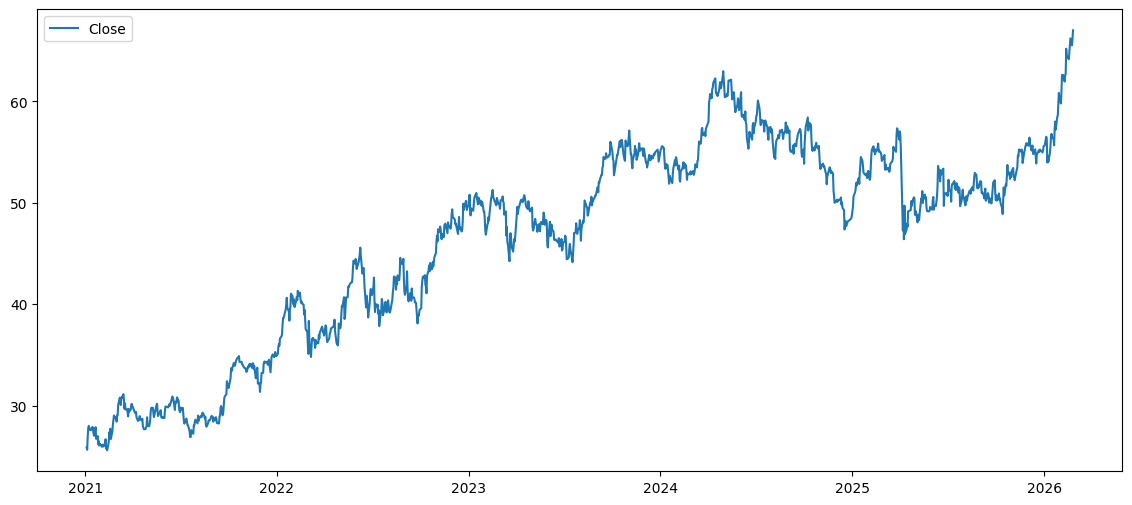

In [ ]:
#graph
import matplotlib.pyplot as plt

def graph(df):

    plt.figure(figsize=(14,6))
    plt.plot(df.index, df['Close'], label='Close')
    
    plt.legend()
    plt.show()

graph(df_tte) 

détection des points bas par la méthode des fractales de Bill Williams

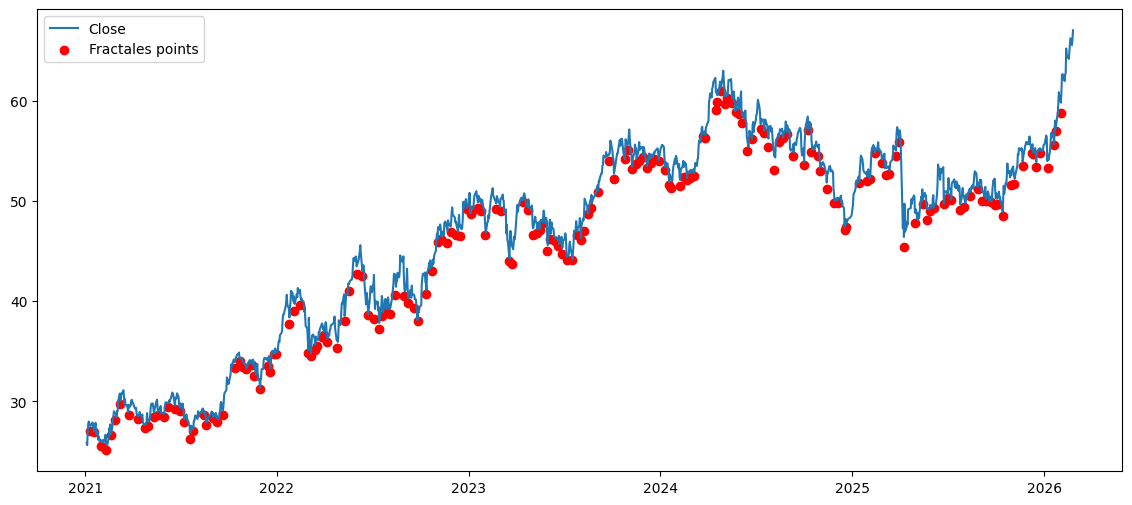

In [3]:
from src.fractal import fractal_5bars
#graph des points bas estimés par fractals
def graph2(df, fractales_points):

    plt.figure(figsize=(14,6))
    plt.plot(df.index, df['Close'], label='Close')
    
    plt.scatter(fractales_points.index,
                fractales_points['Low'],
                color='red',
                label='Fractales points')
    
       
    plt.legend()
    plt.show()
    
fractales_points=fractal_5bars(df_tte)
graph2(df_tte,fractales_points)

calcul du average true range sur le dataset d'entrainement 

In [4]:
from src.atr import average_true_range

#split du dataset: train+test
df_train=df_tte["2021":"2023"]
df_test=df_tte["2024":"2026"]

atr_train = average_true_range(df_train)
atr_mean = atr_train.mean()

définition des points bas signifiants parmis les points bas estimés par fractales via l'algorithme RANSAC sur le dataset de train, projection du support sur le dataset de test

In [5]:
from src.ransac_support import AscendingSupportRANSAC

train_fractals = fractal_5bars(df_train)

model = AscendingSupportRANSAC()

model.fit(train_fractals, atr_mean)

if model.valid_support_:
    support_test = model.predict(df_test)
    inliers = model.get_inliers(train_fractals)

détection du 1er break de support sur le dataset de test

In [6]:
from src.break_detection import SupportBreakDetector

detector = SupportBreakDetector()

break_series = detector.detect(df_test, support_test)

first_break = detector.get_first_break_date()

if first_break:
    print(f"1er break confirmé, date: {first_break}")
else:
    print("Pas de break détecté")

1er break confirmé, date: 2024-01-17 00:00:00


visualisation finale sous forme de graph (points bas du support sur dataset d'entraînement, support projeté sur dataset de test, 1e cassure éventuelle du support)

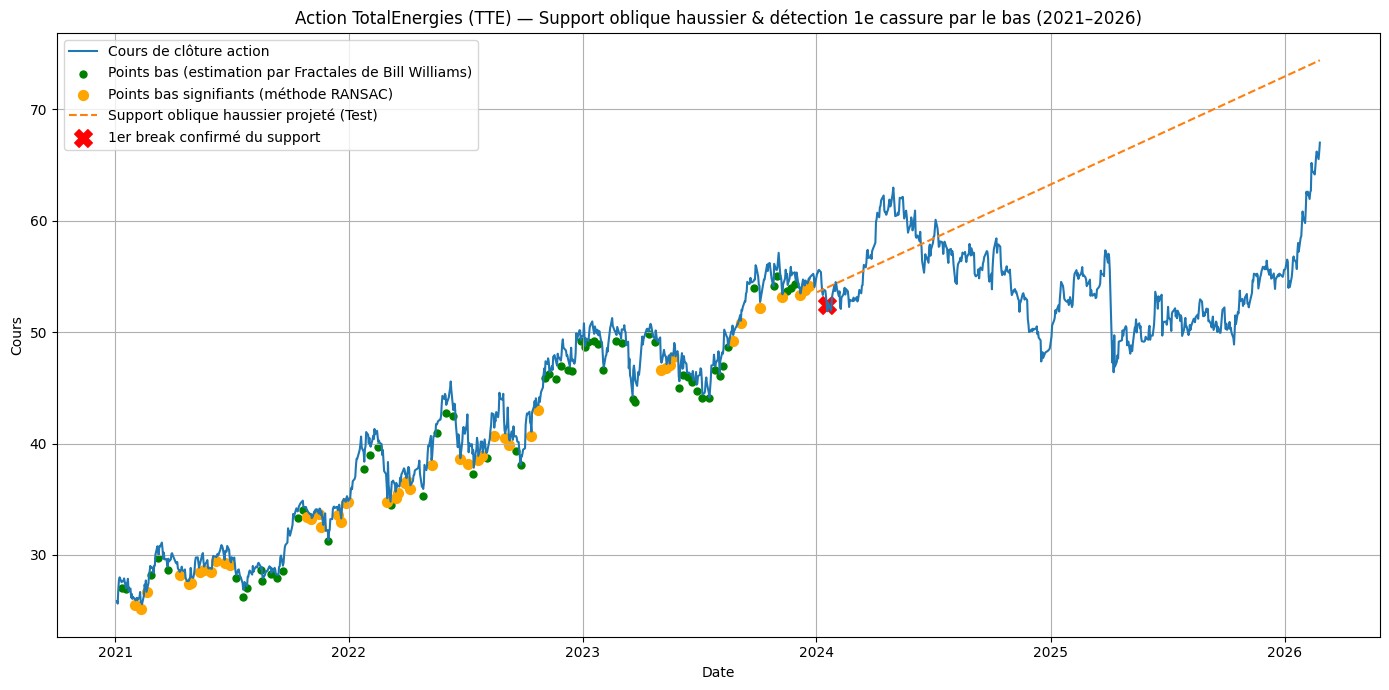

In [ ]:
from src.plot import plot_support_analysis

plot_support_analysis(
    df_train=df_train,
    df_test=df_test,
    fractals_train=train_fractals,
    inliers_train=inliers,
    support_test=support_test,
    break_series=break_series,
    title="Action TotalEnergies (TTE) — Support oblique haussier & détection 1e cassure significative (2021–2026)"
)